In [7]:
import Ploty as ploty 
import importlib
importlib.reload(ploty)
import numpy as np
import matplotlib.pyplot as plt

In [9]:
m = 1400
c = 0.29
A = 2.24
f = 0.08
total_ratio = 1.1
rd = np.pi*(16*25.4 + 2*(50/100)*205) 

g= 9.81
rho = 1.23

v_max = 200*1000/3600      #założenie

F_res = m*g*f + 1/2*rho*A*c*v_max**2
P_res = F_res*v_max

rd

1920.7697484047994

''

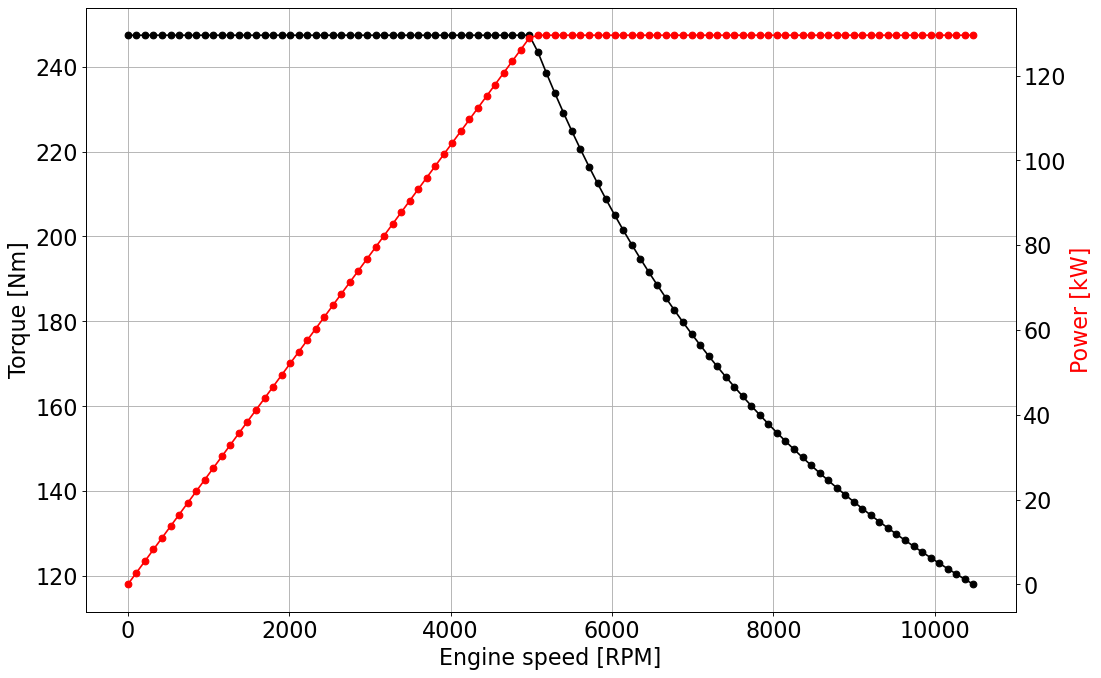

In [11]:
w_max = 10000*np.pi/30  #9000 rpm
w_base = w_max/2

w = np.linspace(0,w_max+50,100)

T = []
P = []
#display(w_base)

count = np.count_nonzero(w<w_base)

for i in range(count):
    T1 = P_res/w_base
    T = np.append(T,T1)


for i in range(count, len(w)):
    T2 = P_res/w[i]
    T = np.append(T,T2)

P = T*w

# -----------------------------    Ploty -----------------------------

ploty.plot_double(w*30/np.pi, T, P/1000) 
#plt.xlim(0,10000)
#plt.axvline(w_base*30/np.pi)
;

''

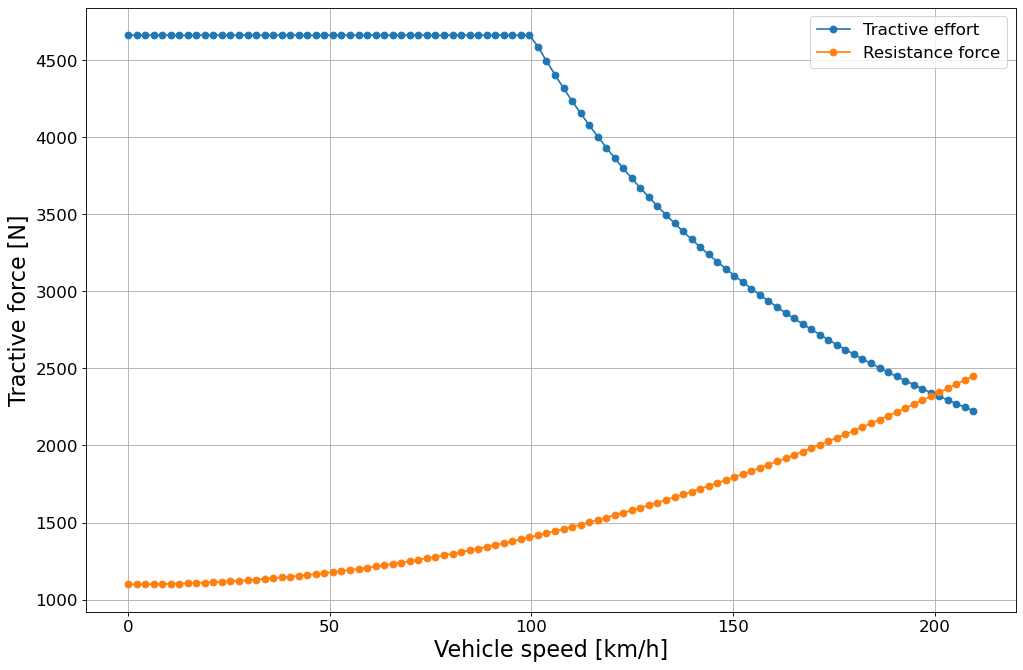

In [12]:
i_max = (w_max*rd)/v_max

v = w*rd/i_max
Ft = T*i_max/rd    # Tractive Force

F1 = m*g*f
F2 = 1/2*rho*A*c*v**2
Fop = F1 + F2

ploty.plot(v*3.6,Ft,'o', label='Tractive effort')
plt.plot(v*3.6,Fop,marker='o',label='Resistance force')

plt.legend(loc='best',fontsize=15)
#plt.ylim(0,4200)
#plt.xlim(0,235)
plt.xlabel('Vehicle speed [km/h]',fontsize = 20)
plt.ylabel('Tractive force [N]',fontsize = 20, color='black')

v_final = w_max*rd/i_max
v_base = w_base*rd/i_max


;

fig = plt.figure(figsize = (8,5) , dpi=80)
ax = plt.subplot()
ax.grid(True)
ax.set_axisbelow(True)

plt.plot(v*3.6,F2, label = 'Drag Force',marker='o')
plt.plot(v*3.6,Fop, label='Total resistance force',marker='o')


plt.legend(loc='best',fontsize = 12)
ax.set_xlabel('Speed [km/h]',fontsize = 14)
ax.set_ylabel('Force [N]',fontsize = 14, color='black')


ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

''

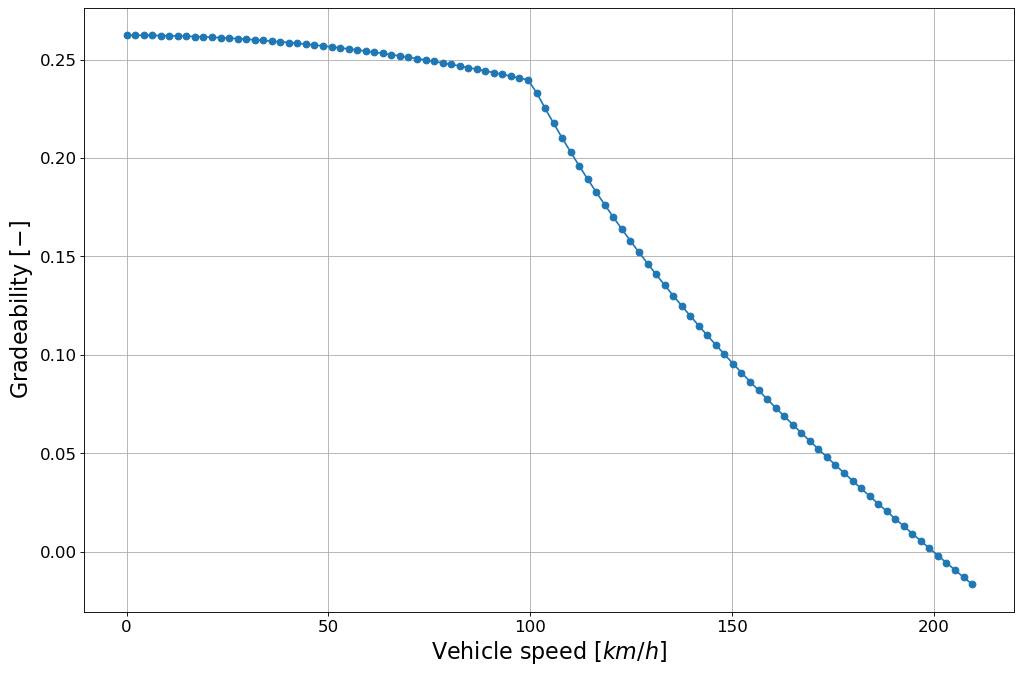

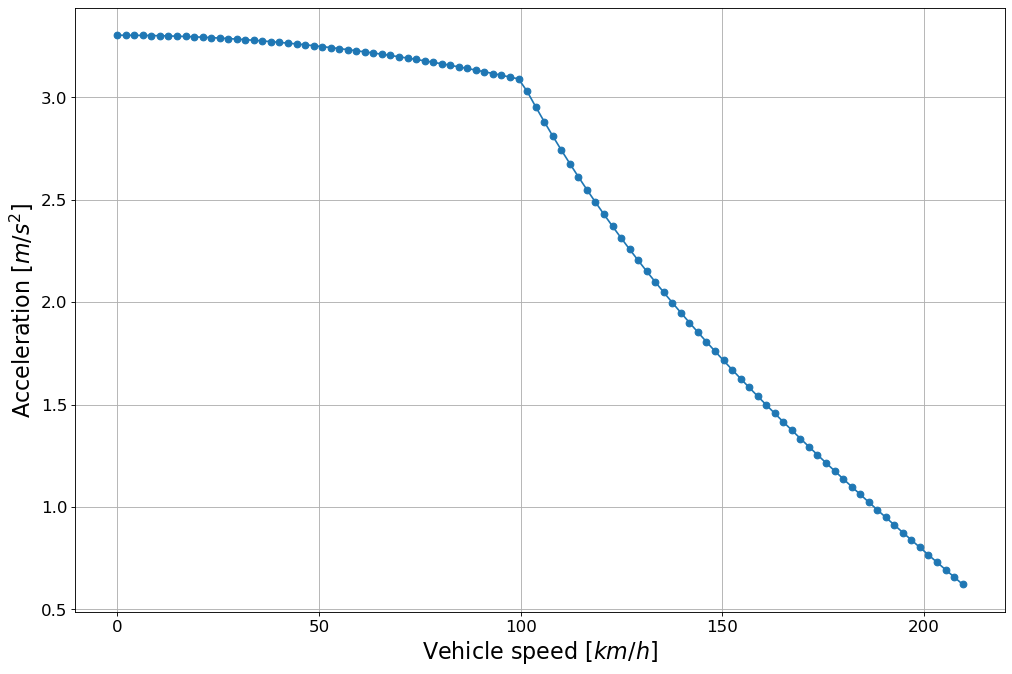

In [13]:
w = (Ft - Fop)/(m*g)

D = (Ft - F2)/(m*g)

sin_a = (D - f*np.sqrt(1 - D**2 + f**2))/(1+f**2)

ploty.plot(v*3.6, sin_a, 'o')
plt.xlabel('Vehicle speed [$km/h$]',fontsize=20)
plt.ylabel('Gradeability [$-$]',fontsize = 20)
#plt.ylim(0,0.25)
#plt.xlim(0,240)


alpha = np.arcsin(sin_a)

cos_a = np.cos(alpha)
F_rd = m*g*(f*cos_a + w)

a = F_rd/m
#display(F_rd)

#display(alpha*180/np.pi)
#display(np.tan(alpha)) ;
ploty.plot(v*3.6,a,'o')
plt.xlabel('Vehicle speed [$km/h$]',fontsize=20)
plt.ylabel('Acceleration [$m/s^2$]',fontsize = 20)
#plt.ylim(0,2.5)
#plt.xlim(0,240)
;

array([  0.        ,   2.11665956,   4.23331912,   6.34997868,
         8.46663825,  10.58329781,  12.69995737,  14.81661693,
        16.93327649,  19.04993605,  21.16659561,  23.28325518,
        25.39991474,  27.5165743 ,  29.63323386,  31.74989342,
        33.86655298,  35.98321254,  38.09987211,  40.21653167,
        42.33319123,  44.44985079,  46.56651035,  48.68316991,
        50.79982948,  52.91648904,  55.0331486 ,  57.14980816,
        59.26646772,  61.38312728,  63.49978684,  65.61644641,
        67.73310597,  69.84976553,  71.96642509,  74.08308465,
        76.19974421,  78.31640377,  80.43306334,  82.5497229 ,
        84.66638246,  86.78304202,  88.89970158,  91.01636114,
        93.1330207 ,  95.24968027,  97.36633983,  99.48299939,
       101.59965895, 103.71631851, 105.83297807, 107.94963763,
       110.0662972 , 112.18295676, 114.29961632, 116.41627588,
       118.53293544, 120.649595  , 122.76625457, 124.88291413,
       126.99957369, 129.11623325, 131.23289281, 133.34

array([ 0.        ,  0.1779816 ,  0.35599439,  0.53406956,  0.71223835,
        0.89053206,  1.06898206,  1.2476198 ,  1.42647686,  1.60558495,
        1.78497592,  1.96468179,  2.14473477,  2.3251673 ,  2.50601201,
        2.68730181,  2.86906987,  3.05134965,  3.23417493,  3.4175798 ,
        3.60159874,  3.78626659,  3.97161858,  4.15769041,  4.34451818,
        4.5321385 ,  4.72058846,  4.90990568,  5.10012836,  5.29129524,
        5.4834457 ,  5.67661976,  5.87085808,  6.06620205,  6.26269379,
        6.46037618,  6.6592929 ,  6.85948847,  7.06100828,  7.26389863,
        7.46820677,  7.67398096,  7.88127046,  8.09012565,  8.30059799,
        8.51274013,  8.72660597,  8.94225063,  9.3151527 ,  9.75062951,
       10.20036427, 10.6648859 , 11.14476015, 11.64059239, 12.15303061,
       12.68276882, 13.23055073, 13.79717378, 14.38349363, 14.9904291 ,
       15.61896758, 16.27017115, 16.94518323, 17.64523607, 18.37165903,
       19.1258879 , 19.90947524, 20.72410198, 21.57159055, 22.45

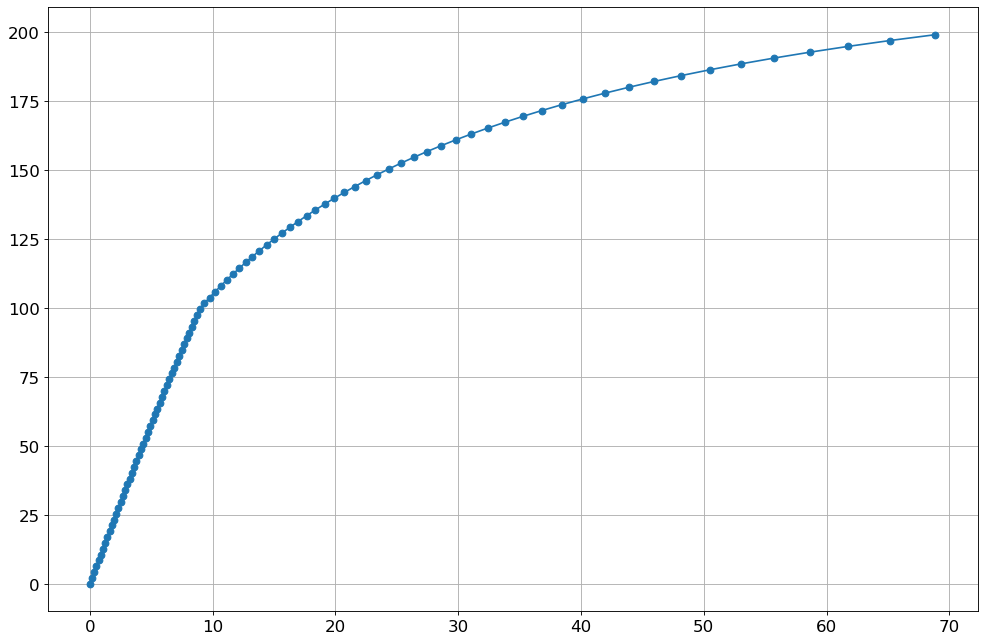

In [14]:
t = []
for i in range(count):
    t1 = v[i]/a[i]
    t = np.append(t,t1)

for i in range(count, len(v)):
    t2 = v[i]/a[i]
    t = np.append(t,t2)

ploty.plot(t[0:len(t)-5],v[0:len(t)-5]*3.6,'o')
display(v*3.6)
display(t)

# Driving Cycle

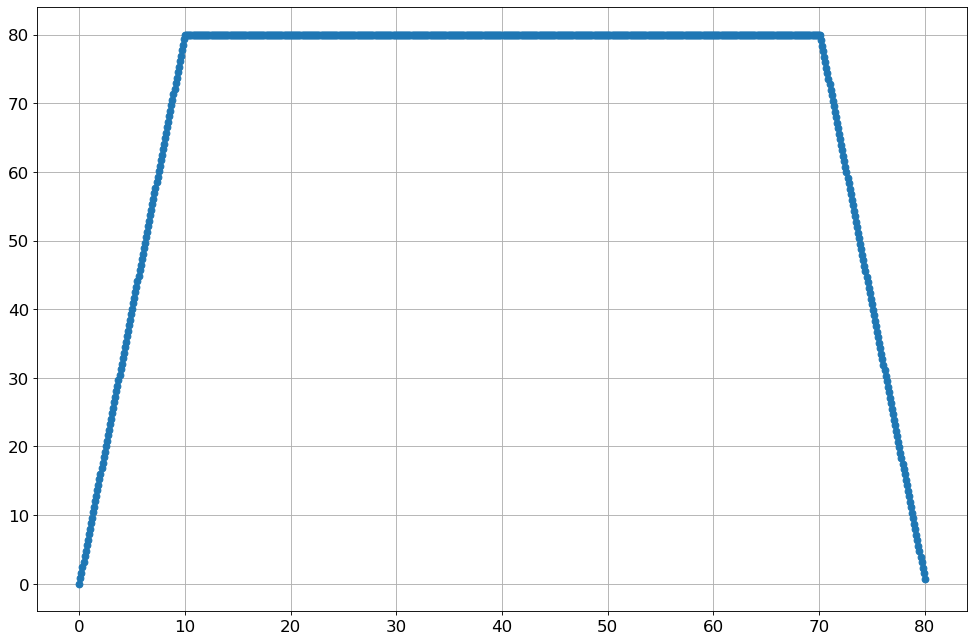

In [15]:
v_st = 80/3.6
t1 = 0 
t2 = 10
t3 = 70
t4 = 80
t = np.linspace(0,t4,800)
tp = (t2 - t1)
th = (t4 - t3)
ap = v_st/(t2-t1)
ah = v_st/(t4 - t3)


v1 = ap*t[0:100]
v2 = [v_st]*600
v3 = v_st - ah*t[0:100]
#count1 = np.count_nonzero(t<t2)
#for i in range(count1, len(t)):
#display(t[0:10])
    #v1 = ap*t[i]
    #display(v1)
#count2 = np.count_nonzero(t>t3)
#for i in range(count2, len(t)):
    #v2 = ah*t[i]
#display(t)
vp = np.append(v1,v2)
v = np.append(vp,v3)
a1 = [ap]*100 
a2 = [0]*600
a3 = [ah]*100

ap = np.append(a1,a2)
a = np.append(ap,a3)
ploty.plot(t, v*3.6, 'o')

#v_avg = np.average(v)
#v_avg

v_avg = 50/3.6
a_

In [16]:
Ft = m*g*f + 1/2*rho*A*c*v**2 + m*a
P_wheel = Ft * v

dt = np.diff(t)

E_cycle = np.sum(P_wheel[1:len(t)]*dt)

E1 = P_wheel[1:len(t)]*dt

E = 0
for i in range(len(E1)):
    E = np.sum(E1[0:i])

    E = np.append(E,E)


